# Respiratory Disease Mortality Rate

In [37]:
# Used for Managing Data
import pandas as pd 
import numpy as np
# Used for loading pkl files 
import pickle 
# Used for Bar Graphs
import matplotlib.pyplot as plt 
# Used for Plotting choropleth maps 
import plotly
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

# Loading Pkl files
df_poll = pickle.load( open( "df_us_pollution.pkl", "rb" ) )
df_poll_grouped = pickle.load(open("df_grouped.pkl", "rb"))
df_mort = pickle.load( open( "df_resp_mortality.pkl", "rb" ) )

In [115]:

#Sums the total mortality rates per state per year (First makes mortality rate into float to be able to sum)
df_mort_nums =df_mort
df_mort_nums['mortality_rate'] = df_mort_nums['mortality_rate'].astype(float)
df_mort2 = df_mort_nums.groupby(['year','state'], as_index=False)['mortality_rate'].sum()

# Sets up Dfs for maps
df_mort_2000 = df_mort2.loc[df_mort2['year'].isin(['2000'])]
df_mort_2005 = df_mort2.loc[df_mort2['year'].isin(['2005'])]
df_mort_2010 = df_mort2.loc[df_mort2['year'].isin(['2010'])]
df_mort_2014 = df_mort2.loc[df_mort2['year'].isin(['2014'])]

# DF for plotting graph.
df_mort_CA = df_mort2.loc[df_mort2['state'].isin(['California'])]
df_mort_TX = df_mort2.loc[df_mort2['state'].isin(['Texas'])]

df_mort_FL = df_mort2.loc[df_mort2['state'].isin(['Florida'])]
df_mort_NY = df_mort2.loc[df_mort2['state'].isin(['New York'])]

In [29]:
# Df for plotly map 
d = {'code':     ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
                  "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
                  
                  "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
                  
                  "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
                  "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"],
     
    'state':      ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','District of Columbia','Delaware','Florida','Georgia',
                   'Hawaii','Idaho', 'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine', 'Maryland',
                   
                   'Massachusetts','Michigan','Minnesota','Mississippi', 'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
                   
                   'New Mexico','New York','North Carolina','North Dakota','Ohio', 'Oklahoma','Oregon','Pennsylvania','Rhode Island','South  Carolina',
                   'South Dakota','Tennessee','Texas','Utah', 'Vermont','Virginia','Washington','West Virginia', 'Wisconsin','Wyoming'] ,
    'text':[0 for r in range(51)]}
dff = pd.DataFrame.from_dict(d)

#Color scale
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

# Text to display when hovered over state
dff['text'] = df_mort_2000['state'] 

# Compile map data
data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2000['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

# Map Layout set up 
layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2000 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

# Plot map
fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2000_Resp_Mortality')

In [30]:
dff['text'] = df_mort_2005['state'] 

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2005['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2005 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2005_Resp_Mortality')

In [31]:
dff['text'] = df_mort_2010['state'] 

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2010['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2010 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2010_Resp_Mortality')

In [32]:
dff['text'] = df_mort_2014['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2014['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2014 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2014_Resp_Mortality')

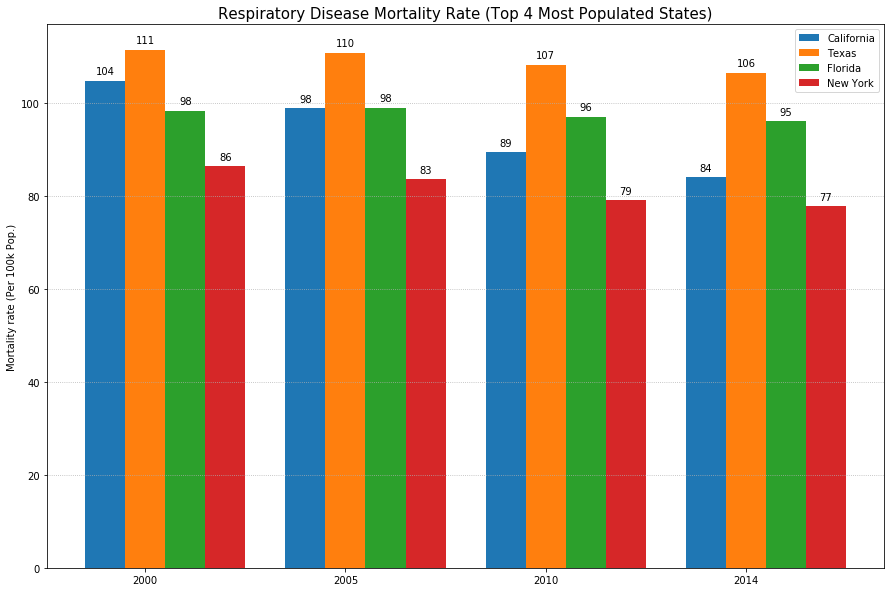

In [148]:
# Picked the 4 states with most pop
ind = np.arange(4)
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(which='major',axis='y', linestyle=':')
b1 = ax.bar(ind, df_mort_CA['mortality_rate'], width, color='C0')
b2 = ax.bar(ind+width, df_mort_TX['mortality_rate'], width, color='C1')
b3 = ax.bar(ind+width*2, df_mort_FL['mortality_rate'], width, color='C2')
b4 = ax.bar(ind+width*3, df_mort_NY['mortality_rate'], width, color='C3')

ax.set_ylabel('Mortality rate (Per 100k Pop.)')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2000', '2005', '2010', '2014') )
ax.legend( (b1[0], b2[0], b3[0], b4[0]), ('California', 'Texas', 'Florida', 'New York' ) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.set_size_inches(15, 10, forward=True)
ax.set_title('Respiratory Disease Mortality Rate (Top 4 Most Populated States)', fontsize= 15)
plt.show()

# Pollution Levels

In [137]:
d = df_poll_grouped.reset_index()
d['year_bin'] =  d["year_bin"].astype(int)
d = d.round({"NO2 Mean":2, "O3 Mean":2, "SO2 Mean":2, "CO Mean":2})

df_poll_2000 = d.loc[d['year_bin'].isin([2000.0])]
df_poll_2005 = d.loc[d['year_bin'].isin([2005.0])]
df_poll_2010 = d.loc[d['year_bin'].isin([2010.0])]
df_poll_2014 = d.loc[d['year_bin'].isin([2014.0])]

#For Plotting... 
df_poll_CA = d.loc[d['State'].isin(['California'])]
df_poll_TX = d.loc[d['State'].isin(['Texas'])]

df_poll_FL = d.loc[d['State'].isin(['Florida'])]
df_poll_NY = d.loc[d['State'].isin(['New York'])]

## N02

In [141]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2000['NO2 Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Billion)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US NO2 Levels by State 2000 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2000_NO2_Poll_Levels')

In [140]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2014['NO2 Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Billion)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US NO2 Levels by State 2014 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2014_NO2_Poll_Levels')

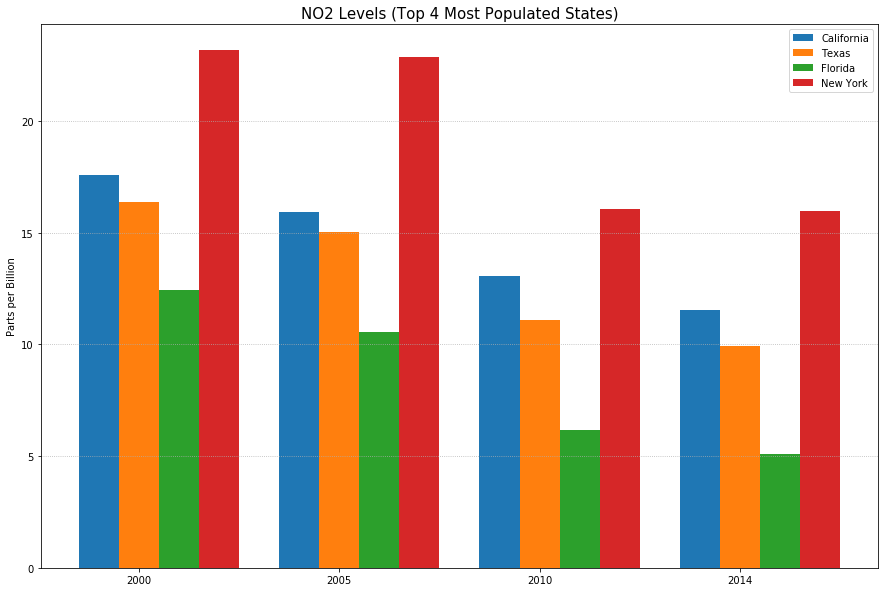

In [149]:
# Picked the 4 states with most pop
ind = np.arange(4)
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(which='major',axis='y', linestyle=':')
b1 = ax.bar(ind, df_poll_CA['NO2 Mean'], width, color='C0')
b2 = ax.bar(ind+width, df_poll_TX['NO2 Mean'], width, color='C1')
b3 = ax.bar(ind+width*2, df_poll_FL['NO2 Mean'], width, color='C2')
b4 = ax.bar(ind+width*3, df_poll_NY['NO2 Mean'], width, color='C3')

ax.set_ylabel('Parts per Billion')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2000', '2005', '2010', '2014') )
ax.legend( (b1[0], b2[0], b3[0], b4[0]), ('California', 'Texas', 'Florida', 'New York' ) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        #ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
        #        ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.set_size_inches(15, 10, forward=True)
ax.set_title('NO2 Levels (Top 4 Most Populated States)', fontsize= 15)
plt.show()

## O3

In [139]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2000['O3 Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Million)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US O3 Levels by State 2000 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2000_O3_Poll_Levels')

In [138]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2014['O3 Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Million)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US O3 Levels by State 2014 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2014_O3_Poll_Levels')

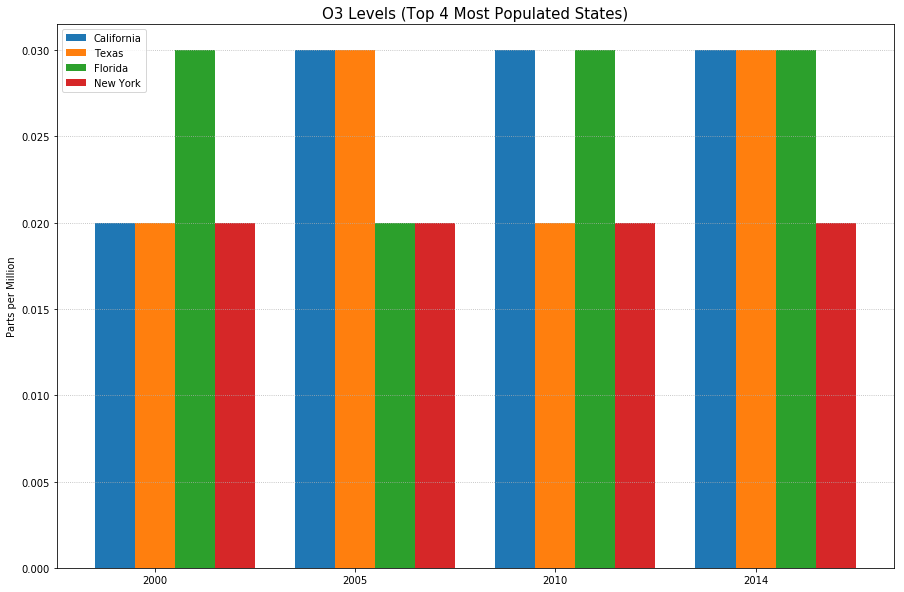

In [150]:
ind = np.arange(4)
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(which='major',axis='y', linestyle=':')
b1 = ax.bar(ind, df_poll_CA['O3 Mean'], width, color='C0')
b2 = ax.bar(ind+width, df_poll_TX['O3 Mean'], width, color='C1')
b3 = ax.bar(ind+width*2, df_poll_FL['O3 Mean'], width, color='C2')
b4 = ax.bar(ind+width*3, df_poll_NY['O3 Mean'], width, color='C3')

ax.set_ylabel('Parts per Million')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2000', '2005', '2010', '2014') )
ax.legend( (b1[0], b2[0], b3[0], b4[0]), ('California', 'Texas', 'Florida', 'New York' ) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        #ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
        #        ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.set_size_inches(15, 10, forward=True)
ax.set_title('O3 Levels (Top 4 Most Populated States)', fontsize= 15)
plt.show()

## SO2

In [142]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2000['SO2 Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Million)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US SO2 Levels by State 2000 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2000_SO2_Poll_Levels')

In [143]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2014['SO2 Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Million)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US SO2 Levels by State 2014 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2014_SO2_Poll_Levels')

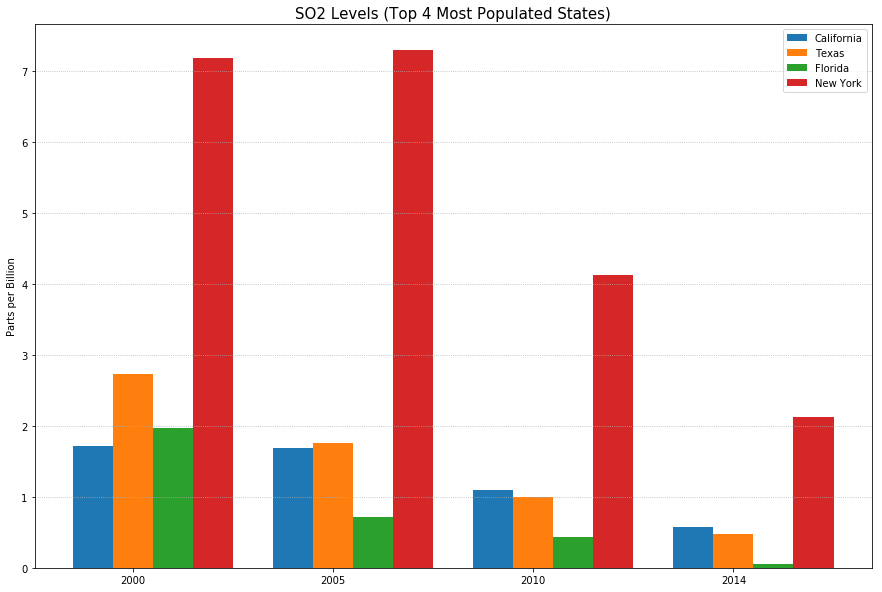

In [151]:
ind = np.arange(4)
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(which='major',axis='y', linestyle=':')
b1 = ax.bar(ind, df_poll_CA['SO2 Mean'], width, color='C0')
b2 = ax.bar(ind+width, df_poll_TX['SO2 Mean'], width, color='C1')
b3 = ax.bar(ind+width*2, df_poll_FL['SO2 Mean'], width, color='C2')
b4 = ax.bar(ind+width*3, df_poll_NY['SO2 Mean'], width, color='C3')

ax.set_ylabel('Parts per Billion')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2000', '2005', '2010', '2014') )
ax.legend( (b1[0], b2[0], b3[0], b4[0]), ('California', 'Texas', 'Florida', 'New York' ) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        #ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
        #        ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.set_size_inches(15, 10, forward=True)
ax.set_title('SO2 Levels (Top 4 Most Populated States)', fontsize= 15)
plt.show()

## CO 

In [146]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2000['CO Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Million)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US CO Levels by State 2000 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2000_CO_Poll_Levels')

In [145]:
dff['text'] = df_mort_2000['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_poll_2014['CO Mean'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Parts per Million)")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US CO Levels by State 2014 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2014_CO_Poll_Levels')

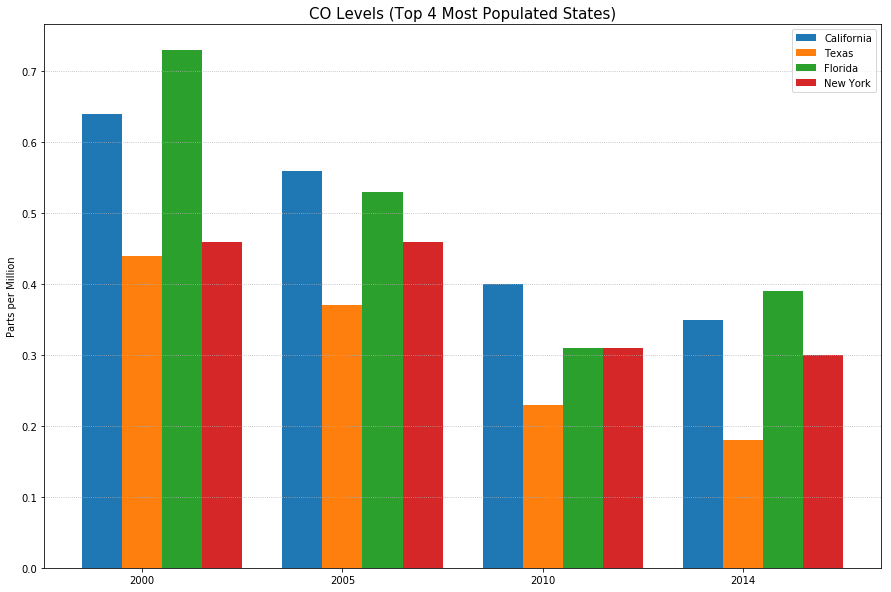

In [152]:
ind = np.arange(4)
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(which='major',axis='y', linestyle=':')
b1 = ax.bar(ind, df_poll_CA['CO Mean'], width, color='C0')
b2 = ax.bar(ind+width, df_poll_TX['CO Mean'], width, color='C1')
b3 = ax.bar(ind+width*2, df_poll_FL['CO Mean'], width, color='C2')
b4 = ax.bar(ind+width*3, df_poll_NY['CO Mean'], width, color='C3')

ax.set_ylabel('Parts per Million')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2000', '2005', '2010', '2014') )
ax.legend( (b1[0], b2[0], b3[0], b4[0]), ('California', 'Texas', 'Florida', 'New York' ) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        #ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
        #        ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.set_size_inches(15, 10, forward=True)
ax.set_title('CO Levels (Top 4 Most Populated States)', fontsize= 15)
plt.show()